# Deutsch-Jozsa Algorithm in Quantum Computing
The **Deutsch-Jozsa Algorithm** is one of the first quantum algorithms proposed, showcasing how quantum computers can solve specific problems exponentially faster than classical ones. The goal is to determine whether a given function \( f(x) \) is **constant** or **balanced** using a quantum circuit.


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


## Step 1: Import Libraries
- **Qiskit**: A framework for quantum programming.
- We use AerSimulator for simulating the quantum circuit and execute to run it.
- plot_histogram is used for visualizing the output.


In [2]:
def deutsch_jozsa_oracle(n, balanced=True):

    oracle = QuantumCircuit(n + 1)
    
    if balanced:
        for i in range(n):
            oracle.cx(i, n)
    else:
        pass

    return oracle


## Step 2: Define the Oracle
The oracle encodes the function \( f(x) \):
- If the function is **balanced**, half the inputs produce \( f(x) = 1 \), and the rest produce \( f(x) = 0 \).
- If the function is **constant**, \( f(x) \) is always \( 0 \) or \( 1 \).
- **Controlled-NOT (CX)** gates are used to flip the output for balanced cases.


In [3]:
def deutsch_jozsa_circuit(n, oracle):

    dj_circuit = QuantumCircuit(n + 1, n)
    
    # Step 1: Initialize the last qubit to |1>
    dj_circuit.x(n)
    
    # Step 2: Apply Hadamard to all qubits
    dj_circuit.h(range(n + 1))
    
    # Step 3: Apply the Oracle
    dj_circuit.append(oracle, range(n + 1))
    
    # Step 4: Apply Hadamard to the first n qubits
    dj_circuit.h(range(n))
    
    # Step 5: Measure the first n qubits
    dj_circuit.measure(range(n), range(n))
    
    return dj_circuit


## Step 3: Construct the Circuit
1. **Last Qubit Initialization**: The auxiliary qubit is set to $ |1\rangle $ to prepare for function evaluation.
2. **Hadamard Transformation**:
   - Applied to all qubits initially to create a superposition of states.
3. **Oracle Application**:
   - Encodes \( f(x) \) as a quantum operation.
4. **Second Hadamard Transformation**:
   - Converts the quantum interference pattern into a measurable form.
5. **Measurement**:
   - Reads the results from the first \( n \) qubits.


Balanced Oracle Results: {'111': 1024}


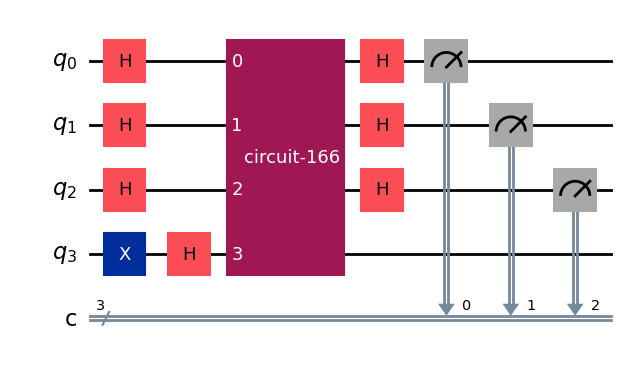

In [4]:
n = 3

oracle_balanced = deutsch_jozsa_oracle(n, balanced=True)

dj_circuit = deutsch_jozsa_circuit(n, oracle_balanced)

simulator = AerSimulator()
compiled_circuit = transpile(dj_circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()


counts = result.get_counts()


print("Balanced Oracle Results:", counts)
dj_circuit.draw('mpl')


## Step 4: Simulation and Results
- The simulation runs the Deutsch-Jozsa circuit for \( n \) input qubits.
- A **balanced oracle** is tested here.
- The output shows whether \( f(x) \) is constant or balanced:
  - If the output is **all 0s**, \( f(x) \) is constant.
  - Any other output indicates \( f(x) \) is balanced.


Constant Oracle Results: {'000': 1024}


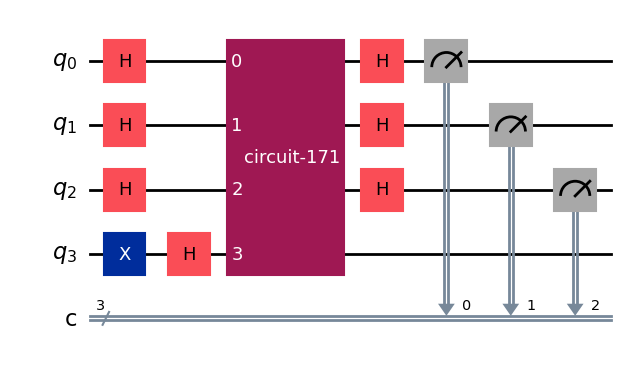

In [5]:
# Test with a constant oracle
oracle_constant = deutsch_jozsa_oracle(n, balanced=False)
dj_circuit_constant = deutsch_jozsa_circuit(n, oracle_constant)

# Simulate
compiled_circuit_constant = transpile(dj_circuit_constant, simulator)
job_constant = simulator.run(compiled_circuit_constant)
result_constant = job_constant.result()


counts_constant = result_constant.get_counts()

# Visualize
print("Constant Oracle Results:", counts_constant)
dj_circuit_constant.draw('mpl')


## Step 5: Testing with a Constant Oracle
- We repeat the process with a constant oracle.
- The circuit should return **all 0s**, indicating that \( f(x) \) is constant.
